In [1]:
import sys
sys.path.append('./../')

import ikamoana.ikaseapodym as ikadym

from ikamoana.utils.feedinghabitatutils import seapodymFieldConstructor
from ikamoana.ikafish.ikafish import IkaMix

In [2]:
configuration_filepath = "./../data/ikamoana_config/IkaSim_Example_Mix.xml"
my_sim = ikadym.IkaSeapodym(filepath=configuration_filepath)

In [3]:
my_sim.ika_params

{'start_distribution': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/',
 'seapodym_file': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/SEAPODYM_data/run-test/skj_CLT_e5_3_est.xml',
 'forcing_dir': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/',
 'start_time': numpy.datetime64('2000-01-15'),
 'duration_time': 94176000,
 'delta_time': 172800,
 'output_delta_time': 2592000,
 'spatial_limits': {'lonlim': (120.0, 290.0), 'latlim': (-40.0, 50.0)},
 'files_only': False,
 'forcing_files': {'test': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/skj_age5.dym',
  'test_2': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/skj_age5.nc'},
 'fields_interp_method': 'nearest',
 'start_length': 26.43,
 'ageing_cohort': True,
 'number_of_cohorts': 1000,
 'start_dynamic_file': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/skj_age',
 'start_dynamic_file_extension

In [4]:
## Using Inna's feeding habitat : ########
# fh = xr.load_dataarray("./../../data/Inna/Modified_skj_cohort_habitat_20080115-20080515_20080115.nc")
# my_sim.loadFields(from_habitat=fh)

## Using ikafield class : ################
my_sim.loadFields()

 It will also add +1 to sigma_min. Cf. function documentation for more details.


In [5]:
# my_sim.initializeParticleSet(particles_class=IkaFish, method="start_static_file")
my_sim.initializeParticleSet(particles_class=IkaMix,
                            #  particles_number=10000,
                             method="start_static_file")

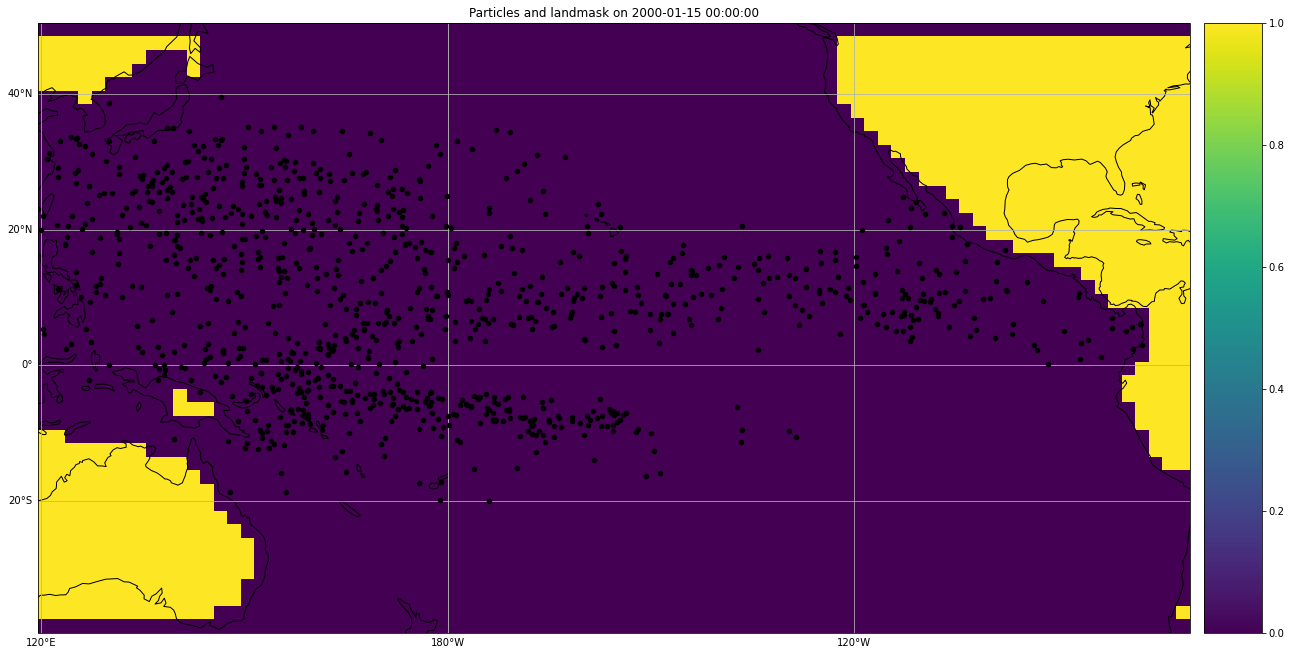

In [6]:
my_sim.fish.show(field=my_sim.ocean.landmask)

In [7]:
print("Nb fish = ",len(my_sim.fish))

Nb fish =  1000


In [8]:
my_sim.ocean.U.interp_method

'nearest'

In [9]:
my_sim.runKernels()

INFO: Compiled ArrayIkaMixCalcLonLatScalersIkAdvectionRK4TaxisRK4RandomWalkNonUniformDiffusionIkaDimMoveWithDiffusionRerollFishingMortalityNaturalMortalityUpdateSurvivalProbUpdateMixingPeriodAge ==> /tmp/parcels-1000/lib49ea313e8221e2dc0b6afa0ca4147f70_0.so


In [10]:
print("Nb fish = ",len(my_sim.fish))

Nb fish =  930


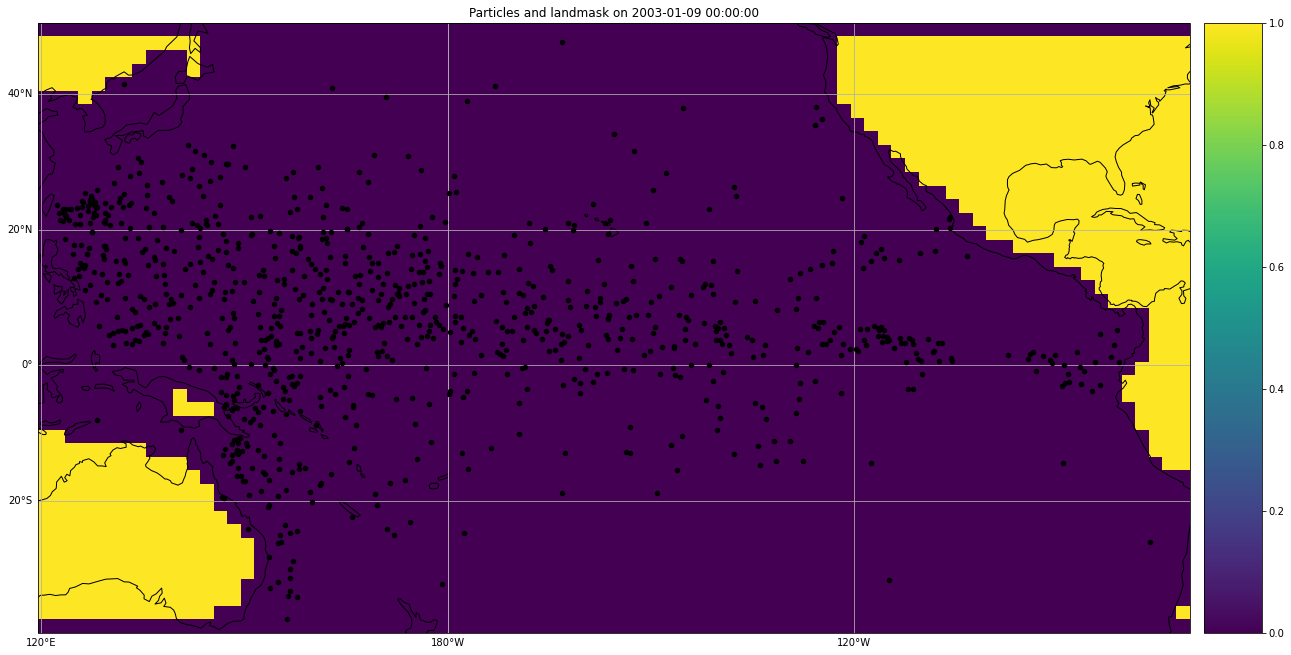

In [11]:
my_sim.fish.show(field=my_sim.ocean.landmask, with_particles=True)

In [12]:
my_sim.fish[0]

P[0](lon=244.036453, lat=17.128201, depth=0.000000, age_class=36.000000, region=0.000000, CapProb=nan, SurvProb=1.000000, TAL=0.000000, Mix3CapProb=nan, Mix6CapProb=nan, Mix9CapProb=nan, Mix3SurvProb=1.000000, Mix6SurvProb=1.000000, Mix9SurvProb=1.000000, time=94176000.000000)

---